In [1]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
from sklearn.metrics import  roc_curve, auc ,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pima = pd.read_csv('diabetes.csv', sep=';')
df = pd.read_csv('diabetes_pt1.csv', sep=';')
df_test = pd.read_csv('diabetes_pt2.csv', sep=';')

/tmp/ipykernel_89572/332813748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Outcome', data=pima, palette="Set2")


Text(0, 0.5, 'Number of People')

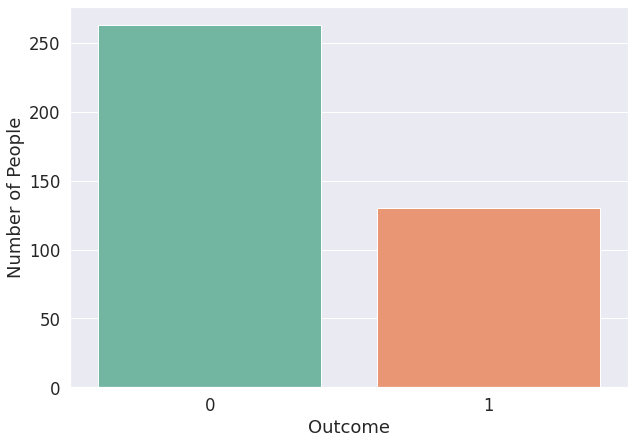

In [3]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Outcome', data=pima, palette="Set2")
plt.ylabel('Number of People')

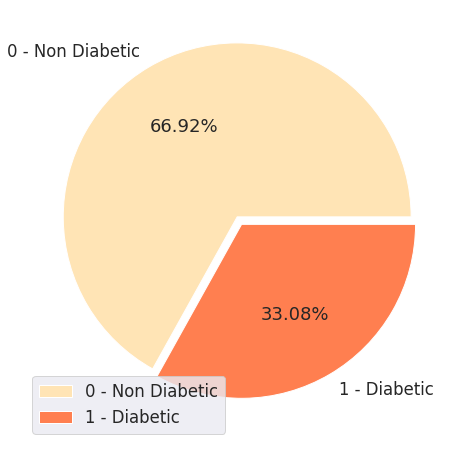

In [4]:
plt.figure(figsize=(8,8))
pieC = pima['Outcome'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['0 - Non Diabetic', '1 - Diabetic']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('0 - Non Diabetic', '1 - Diabetic'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

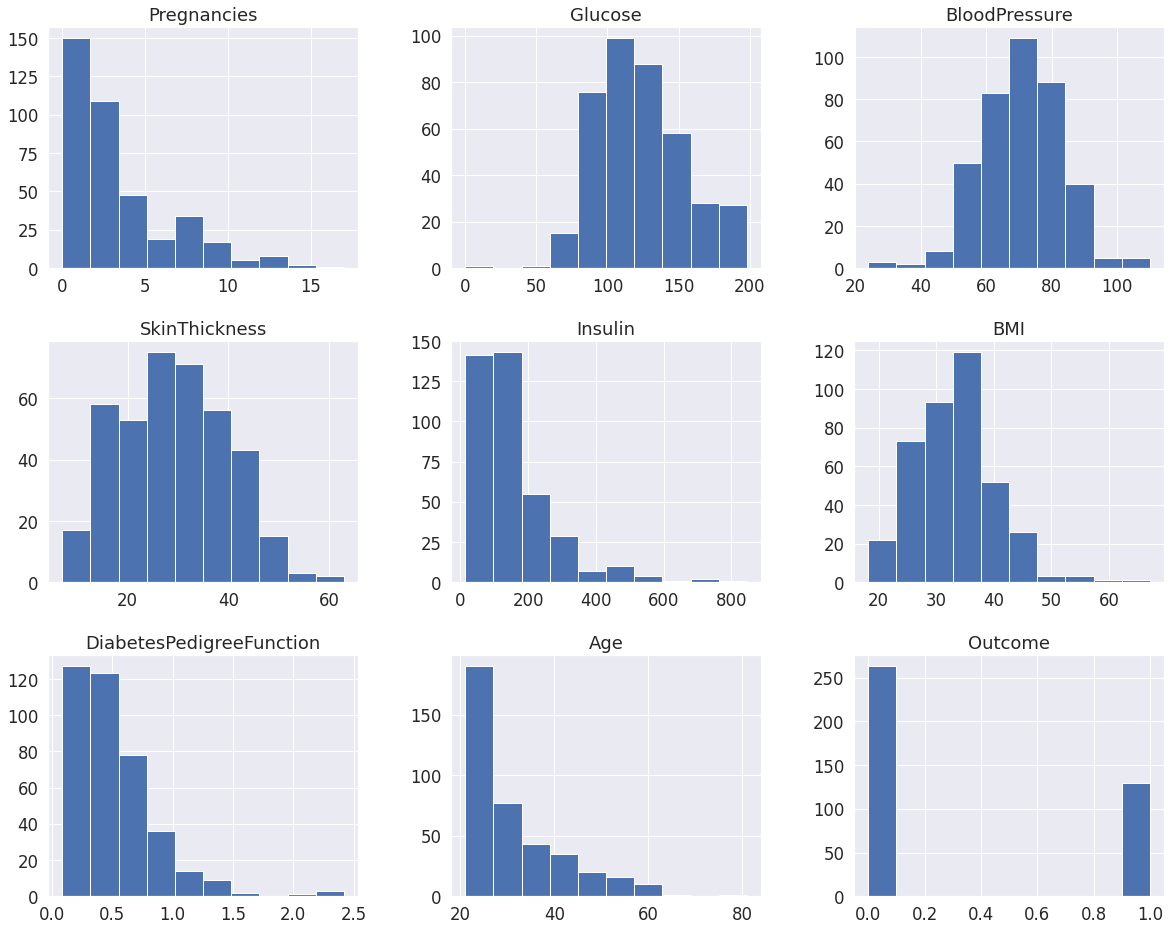

In [5]:
pima.hist(figsize = (20,16),grid=True)

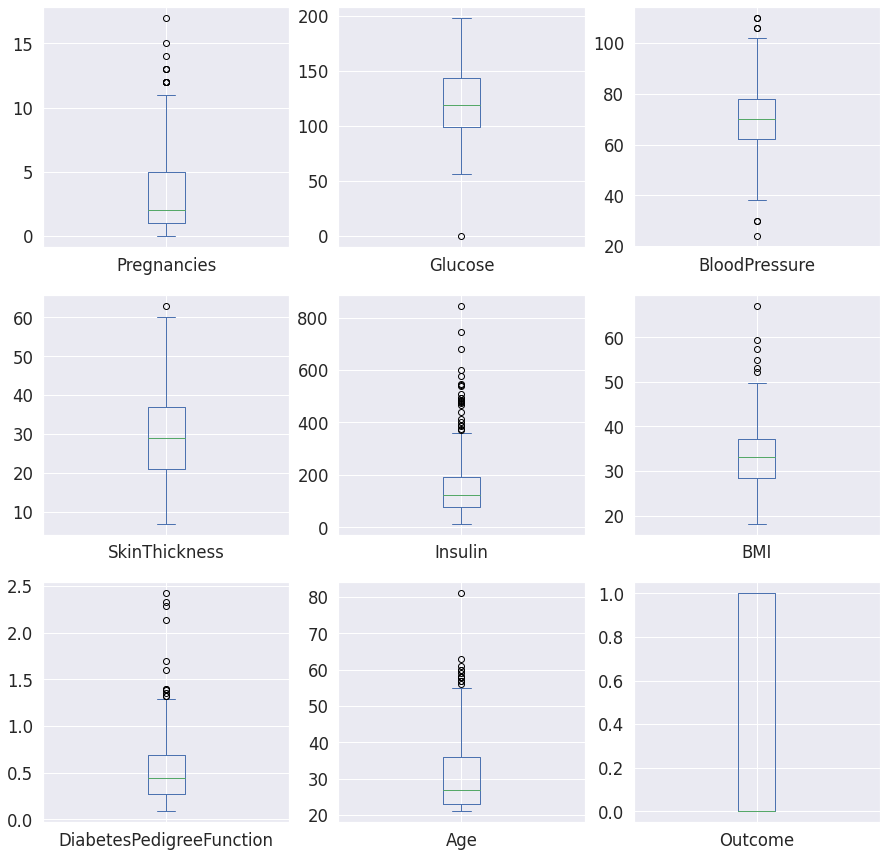

In [6]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

In [7]:
# plt.figure(figsize=(15,6))
# sns.set(font_scale = 1.5)
# sns.countplot(pima['Pregnancies'])
# plt.ylabel('Number of People')

/tmp/ipykernel_89572/2277464663.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pima.Glucose, ax = ax[0,0], color = 'orange')
/tmp/ipykernel_89572/2277464663.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pima.Pregnancies, ax = ax[0,1], color = 'red')
/tmp/ipykernel_89572/2277464663.py:

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

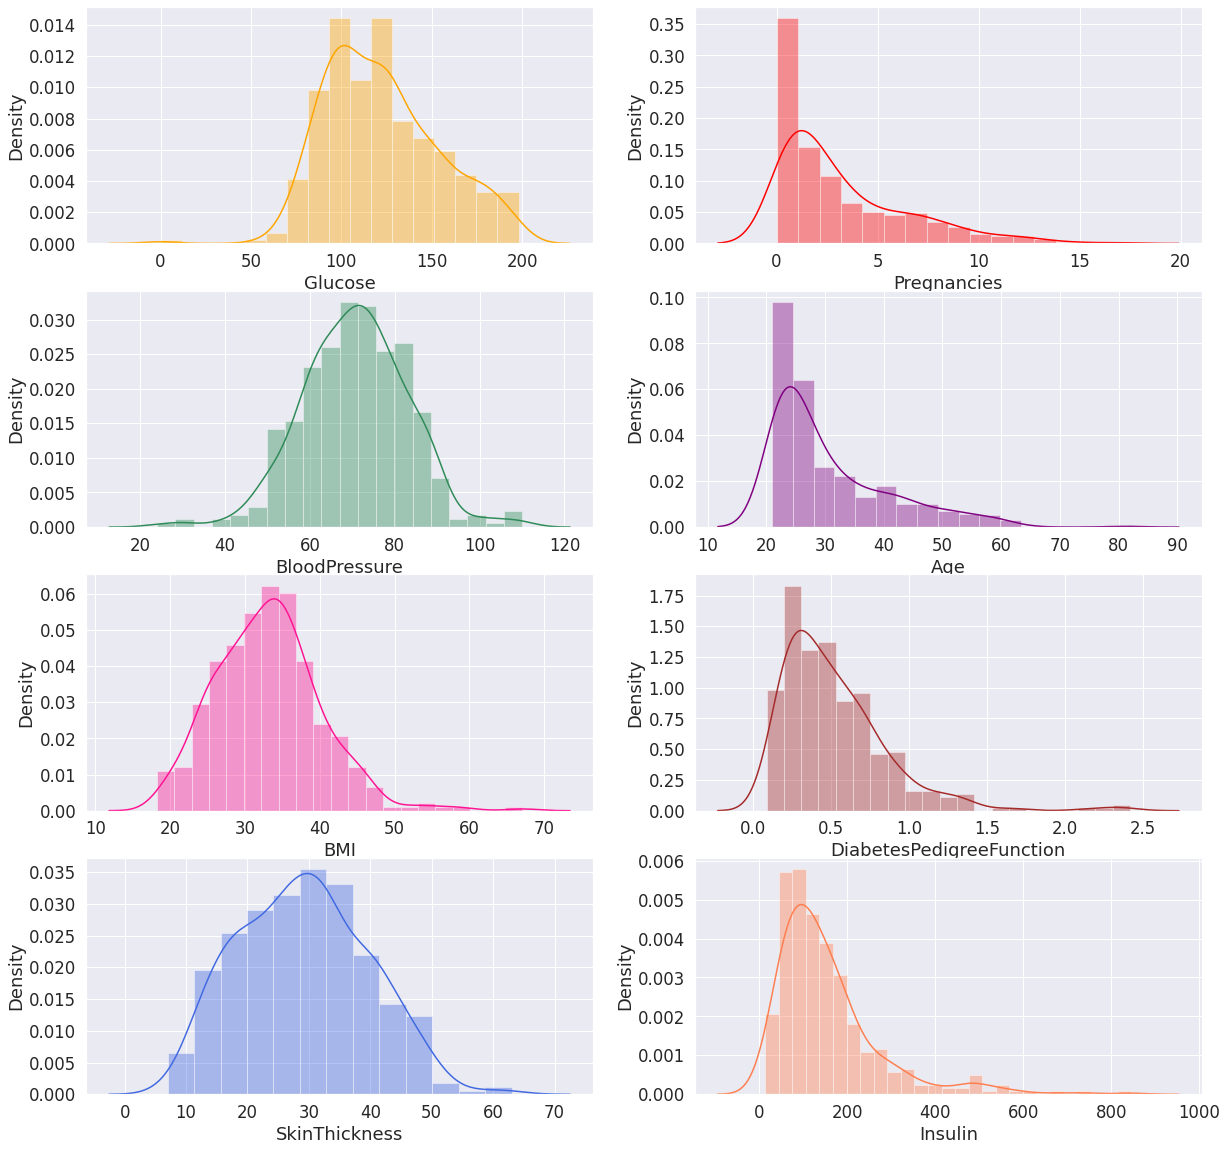

In [8]:
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.set(font_scale = 1)
sns.distplot(pima.Glucose, ax = ax[0,0], color = 'orange')
sns.distplot(pima.Pregnancies, ax = ax[0,1], color = 'red')
sns.distplot(pima.BloodPressure, ax = ax[1,0], color = 'seagreen')
sns.distplot(pima.Age, ax = ax[1,1], color = 'purple')
sns.distplot(pima.BMI, ax = ax[2,0], color = 'deeppink')
sns.distplot(pima.DiabetesPedigreeFunction, ax = ax[2,1], color = 'brown')
sns.distplot(pima.SkinThickness, ax = ax[3,0], color = 'royalblue')
sns.distplot(pima.Insulin, ax = ax[3,1], color = 'coral')

<AxesSubplot:>

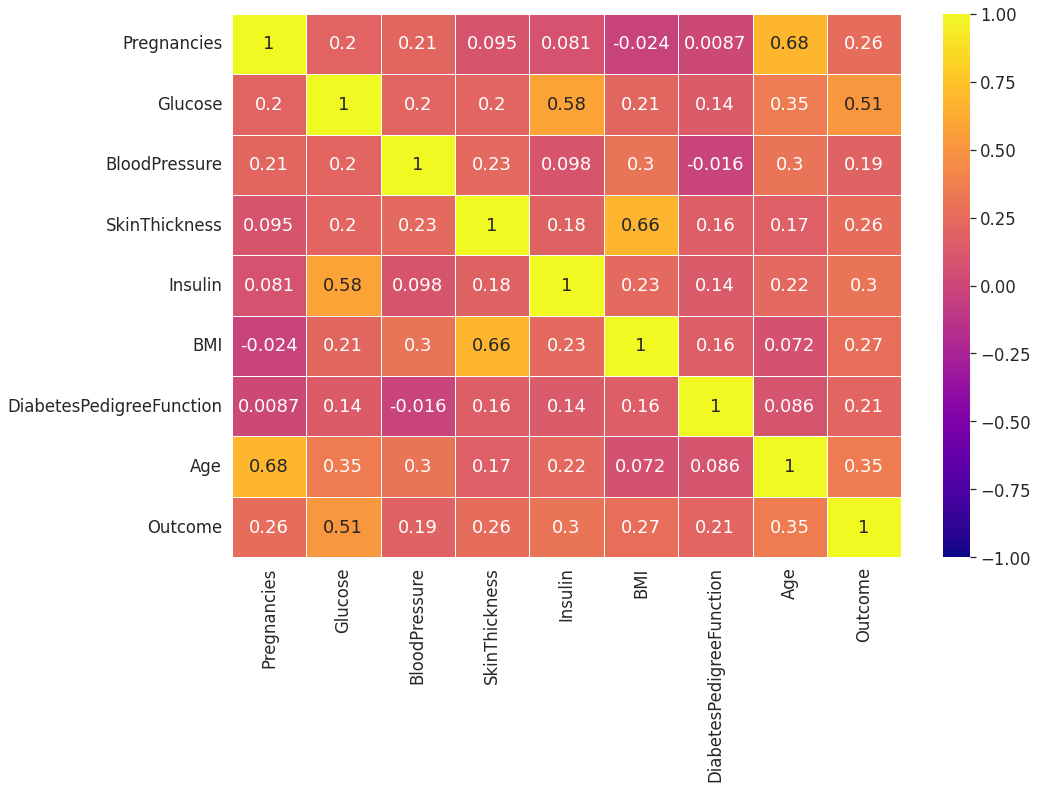

In [9]:
corr = pima.corr()
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.heatmap(corr, annot = True, cmap = 'plasma', vmin = -1, vmax = 1, linecolor='white', linewidths= 1)

Jakieś moje dziwne próby

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


generated quantities {
    real Pregnancies = 1 + exponential_rng(1);
    real Glucose = normal_rng(130, 50);
    real BloodPressure = normal_rng(65, 30);
    real SkinThickness = normal_rng(40, 10);
    real Insulin = normal_rng(100, 25);
    real BMI = normal_rng(40, 10);
    real DiabetesPedigreeFunction = normal_rng(0.5, 0.1);
    real Age = 21 + exponential_rng(0.05);  // Niska wartość parametru, zakładamy, że wiek jest rozłożony na szerszym zakresie
    //int Outcome = bernoulli_rng(inv_logit(-6 + 0.05 * Glucose + 0.035 * Age + 0.025));  // Model logistyczny
    int Outcome = bernoulli_rng(inv_logit(-13 + 0.05 * Glucose + 0.035 * Age + 0.025 * Pregnancies + 0.02 * BloodPressure + 0.025 * SkinThickness + 0.03 * Insulin + 0.025 * BMI + 0.02 * DiabetesPedigreeFunction));  // Model logistyczny
}



chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


/tmp/ipykernel_89572/3605615898.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(whot.Pregnancies, ax = ax[0,0], color = 'blue')
/tmp/ipykernel_89572/3605615898.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(whot.Glucose, ax = ax[0,1], color = 'orange')
/tmp/ipykernel_89572/3605615898.

<AxesSubplot:xlabel='Age', ylabel='Density'>

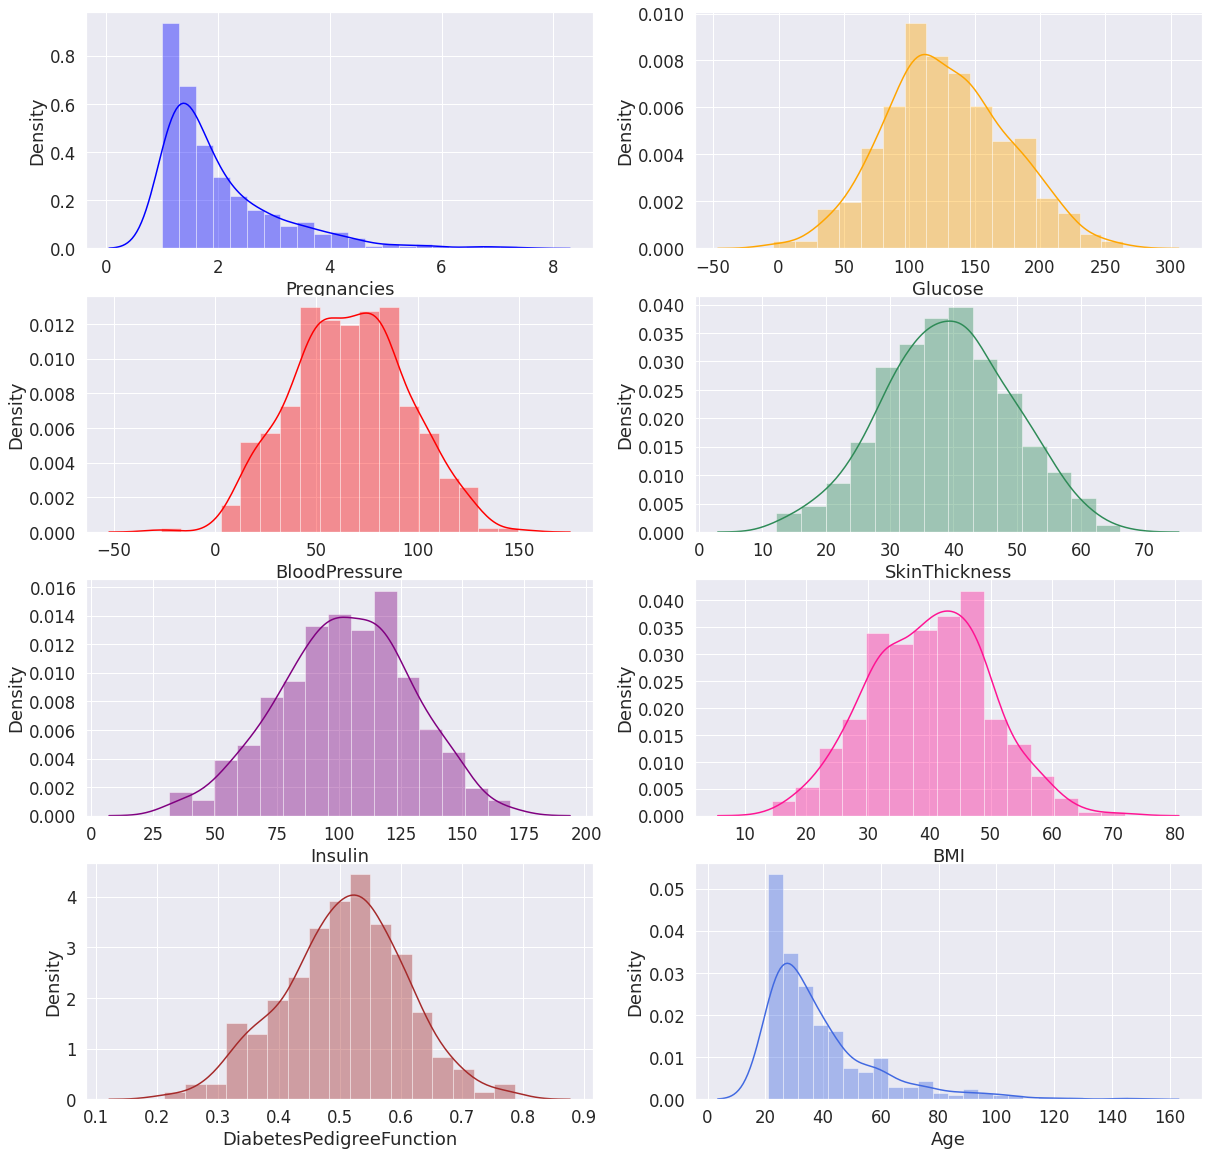

In [10]:
with open('population_0.stan', 'r') as f:

   print(f.read())
model_ppc=CmdStanModel(stan_file='population_0.stan')

R = 393
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=1,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)
whot = sim.draws_pd().iloc[:, -9:]
whot.head()
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.set(font_scale = 1)
sns.distplot(whot.Pregnancies, ax = ax[0,0], color = 'blue')
sns.distplot(whot.Glucose, ax = ax[0,1], color = 'orange')
sns.distplot(whot.BloodPressure, ax = ax[1,0], color = 'red')
sns.distplot(whot.SkinThickness, ax = ax[1,1], color = 'seagreen')
sns.distplot(whot.Insulin, ax = ax[2,0], color = 'purple')
sns.distplot(whot.BMI, ax = ax[2,1], color = 'deeppink')
sns.distplot(whot.DiabetesPedigreeFunction, ax = ax[3,0], color = 'brown')
sns.distplot(whot.Age, ax = ax[3,1], color = 'royalblue')

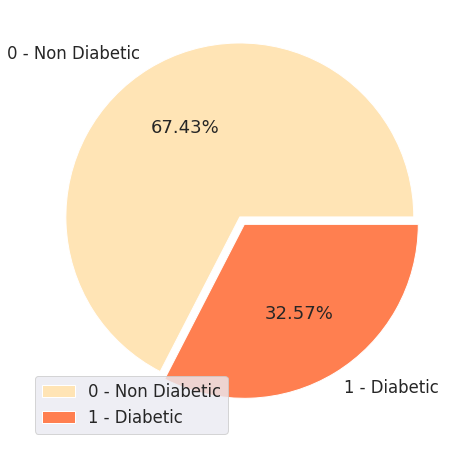

In [11]:
plt.figure(figsize=(8,8))
pieC = whot['Outcome'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['0 - Non Diabetic', '1 - Diabetic']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('0 - Non Diabetic', '1 - Diabetic'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

Dalsza praca

In [12]:
stan_data = {
    'N': len(df),
    'K': len(df.columns) - 1,
    'X': df.drop('Outcome', axis=1).values,
    'y': df['Outcome'].values
}

test_data = {
    'N': len(df_test),
    'K': len(df_test.columns) - 1,
    'X': df_test.drop('Outcome', axis=1).values,
    'y': df_test['Outcome'].values
}

In [13]:
sm = CmdStanModel(stan_file='code_0.stan') # ten model jest słaby

fit = sm.sample(data=stan_data, iter_sampling=2000, chains=4, iter_warmup=1000, seed=101)

def logit(x):
    return 1 / (1 + np.exp(-x))

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▋         | 00:00 Iteration:    1 / 3000 [  0%]  (Warmup)




chain 1 |▉         | 00:00 Iteration:  100 / 3000 [  3%]  (Warmup)


chain 1 |█▌        | 00:00 Iteration:  300 / 3000 [ 10%]  (Warmup)


chain 1 |██▏       | 00:00 Iteration:  500 / 3000 [ 16%]  (Warmup)


chain 1 |██▊       | 00:01 Iteration:  700 / 3000 [ 23%]  (Warmup)


chain 1 |███▍      | 00:01 Iteration:  900 / 3000 [ 30%]  (Warmup)


chain 1 |████▍     | 00:01 Iteration: 1100 / 3000 [ 36%]  (Sampling)


chain 1 |█████     | 00:01 Iteration: 1300 / 3000 [ 43%]  (Sampling)


chain 1 |█████▋    | 00:01 Iteration: 1500 / 3000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1700 / 3000 [ 56%]  (Sampling)



chain 1 |██████▉   | 00:01 Iteration: 1900 / 3000 [ 63%]  (Sampling)

chain 1 |███████▌  | 00:02 Iteration: 2100 / 3000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 I


INFO:cmdstanpy:CmdStan done processing.


In [14]:

beta_samples = fit.stan_variable('beta')
alpha_samples = fit.stan_variable('alpha')


beta_mean = np.mean(beta_samples, axis=0)
alpha_mean = np.mean(alpha_samples)

In [15]:

logit_preds = np.dot(test_data['X'], beta_mean) + alpha_mean
preds = logit(logit_preds) > 0.5 

true_labels = test_data['y']

In [16]:

accuracy = accuracy_score(true_labels, preds)
precision = precision_score(true_labels, preds)
recall = recall_score(true_labels, preds)
f1 = f1_score(true_labels, preds)
conf_matrix = confusion_matrix(true_labels, preds)

In [17]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.84
Precision: 0.8260869565217391
Recall: 0.6129032258064516
F1 Score: 0.7037037037037037
Confusion Matrix:
[[65  4]
 [12 19]]


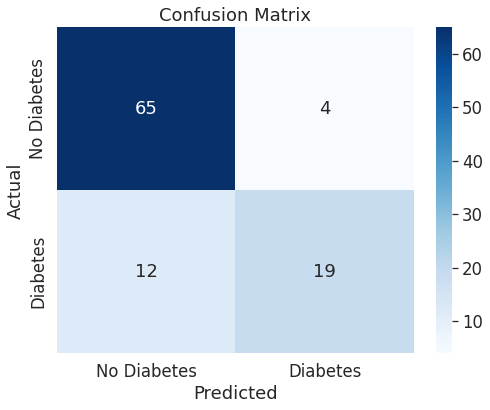

In [18]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
